In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('final_data.csv')

In [3]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [5]:
df.isnull().sum()


player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [8]:
df.shape

(10754, 22)

Now lets define our training and test datasets.

In [9]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

Columns of object datatype doesnot contribute to training dataset so lets drop these columns.

columns=['player', 'team', 'name','position']

In [10]:
df=df.drop(columns=['player', 'team', 'name','position'])
df

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


Dividing into predictors and target variable.

In [11]:
X = df.drop(columns=["current_value"])
y=df['current_value']

Now lets split our data into Train and test dataset.



### **Note**
  We should always first split our data into train and test and then perform feature scaling.
  
  The purpose of the test set is to provide an unbiased evaluation of your model's performance on unseen data. If you scale your features before the split, your model might perform artificially well on the test set, as the scaling parameters would have been influenced by the test set itself.

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

### **Feature Scaling**
  As there are features with larger magnitudes, they may dominate the feature with smaller magnitudes. So, feature scaling ensures that all features contribute equally to train the model.
  
  Meaning, normalize the range of independent/predictors variables.



In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [18]:
X_train.iloc[:,:]=sc.fit_transform(X_train.iloc[:,:])

In [19]:
X_train

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
579,1.256442,-0.832940,0.525807,-0.022490,1.344547,0.121927,-0.189192,-0.07732,-0.297197,-0.046289,-0.110734,0.084336,-0.115480,0.282727,0.147316,0.290855,-0.667198
9241,-2.468294,1.257030,0.071441,-0.046252,1.782835,-0.430580,-0.189192,-0.07732,-0.297197,-0.046289,-0.829838,-0.589648,-0.585329,0.819065,-0.338199,1.303901,1.498805
7108,-0.892444,0.003048,-0.420789,0.257230,-0.169606,0.141848,-0.189192,-0.07732,-0.297197,-0.046289,-0.505049,-0.635342,-0.585329,-0.521782,-0.194061,1.303901,1.498805
224,0.253629,-0.832940,0.866581,-0.235610,0.362264,0.048312,-0.189192,-0.07732,-0.297197,-0.046289,0.697266,-0.069881,0.055374,0.550896,0.905933,-0.722192,1.498805
10194,0.001543,0.003048,-0.307197,0.130719,-0.329885,-0.070488,-0.189192,-0.07732,-0.297197,-0.046289,-0.085406,-0.669612,-0.670756,-0.521782,-0.429233,1.303901,-0.667198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,0.396888,1.257030,0.336487,1.196571,1.297154,0.145908,0.743479,-0.07732,-0.297197,-0.046289,0.726566,-0.669612,-0.670756,0.014557,-0.323026,1.303901,1.498805
7291,1.686219,1.675024,-0.723699,-0.527325,-0.601695,-0.430580,-0.189192,-0.07732,1.293426,0.301880,-0.456877,-0.509684,-0.542615,0.014557,-0.417853,-1.735238,-0.667198
1344,-1.178962,1.048033,1.093764,-0.116070,0.247665,0.019510,0.812054,-0.07732,-0.297197,-0.046289,0.593472,-0.172692,-0.200907,0.014557,0.147316,1.303901,1.498805
7293,2.402514,-1.250935,-1.102337,-0.527325,-0.601695,-0.430580,-0.189192,-0.07732,4.619275,-0.046289,-0.888936,-0.669612,-0.670756,-0.521782,-0.455784,-1.735238,-0.667198


In [20]:
X_test.iloc[:,:]=sc.transform(X_test.iloc[:,:])

In [21]:
X_test

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
181,-0.462667,0.003048,1.283083,0.922719,0.995510,-0.210167,-0.189192,-0.077320,-0.297197,-0.046289,1.093568,-0.458278,-0.414475,0.282727,1.209380,1.303901,1.498805
9058,0.001543,-1.250935,-1.329520,-0.527325,-0.601695,-0.430580,-0.189192,-0.077320,-0.297197,-0.046289,-1.194357,-0.669612,-0.670756,-0.521782,-0.455784,1.303901,1.498805
9233,-0.749185,0.839036,-0.875154,-0.527325,-0.601695,0.457179,-0.189192,-0.077320,-0.297197,-0.046289,-0.987267,-0.669612,-0.670756,-0.521782,-0.427336,0.290855,-0.667198
8366,1.972737,1.048033,-1.291656,-0.527325,-0.601695,-0.430580,-0.189192,-0.077320,1.216269,0.616272,-1.150158,-0.669612,-0.670756,-0.253612,-0.368543,-1.735238,-0.667198
3977,0.969924,0.421042,-0.837291,-0.527325,-0.086568,-0.430580,-0.189192,-0.077320,-0.297197,-0.046289,-0.619768,-0.229809,-0.329048,0.550896,-0.391302,-0.722192,-0.667198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,-0.176149,1.257030,0.109305,-0.180329,0.162729,-0.367286,-0.189192,0.238749,-0.297197,-0.046289,0.392341,-0.366890,-0.542615,3.500759,-0.269923,0.290855,-0.667198
4109,-0.892444,-0.205949,1.320947,-0.239715,1.061498,0.002228,-0.189192,-0.077320,-0.297197,-0.046289,1.371674,-0.669612,-0.670756,-0.253612,-0.398888,1.303901,1.498805
2447,0.110370,-0.205949,0.563670,-0.527325,-0.601695,0.166428,-0.189192,-0.077320,-0.297197,-0.046289,0.148005,0.432752,0.824218,-0.253612,0.109385,0.290855,-0.667198
2187,2.545773,2.093018,2.381133,-0.527325,-0.601695,-0.407718,-0.189192,-0.077320,2.551561,0.181360,3.237969,0.221418,0.610650,0.819065,0.450763,-1.735238,-0.667198


***fit_transform on the Training Set:***

> When you use fit_transform on the training set, the scaler (in this case, sc) computes the necessary parameters for scaling (e.g., mean and standard deviation for standardization) based on the values in the training set.

> The fit_transform method not only transforms the training set but also calculates and stores the scaling parameters.

***transform on the Test Set***

> This applies the same scaling parameters (mean and standard deviation) that were computed from the training set to the test set.

> This approach helps prevent information from the test set influencing the scaling process, avoiding data leakage and providing a more realistic evaluation of the model's performance on unseen data.

Now, lets use DecisionTree algorithm.
Since it is a regression model so we use DecisionTreeRegressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()

In [23]:
dtc.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
y_pred=dtc.predict(X_test)


### **R-squared (R2) score**

> measures the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model

> The R2 score is a value between 0 and 1

> A score of 1 indicates that the model perfectly predicts the target variable, while a score of 0 indicates that the model does not provide any improvement over a simple mean-based prediction







In [25]:
from sklearn.metrics import r2_score

In [26]:
score=r2_score(y_test,y_pred)
score

0.7550139444391416

**Observation**
*   An R2 score of 0.755 indicates that the regression model explains approximately 75.5% of the variance in the target variable
*   An R2 score of 0.755 is considered relatively high and indicates a reasonably good fit of the regression model to the data.



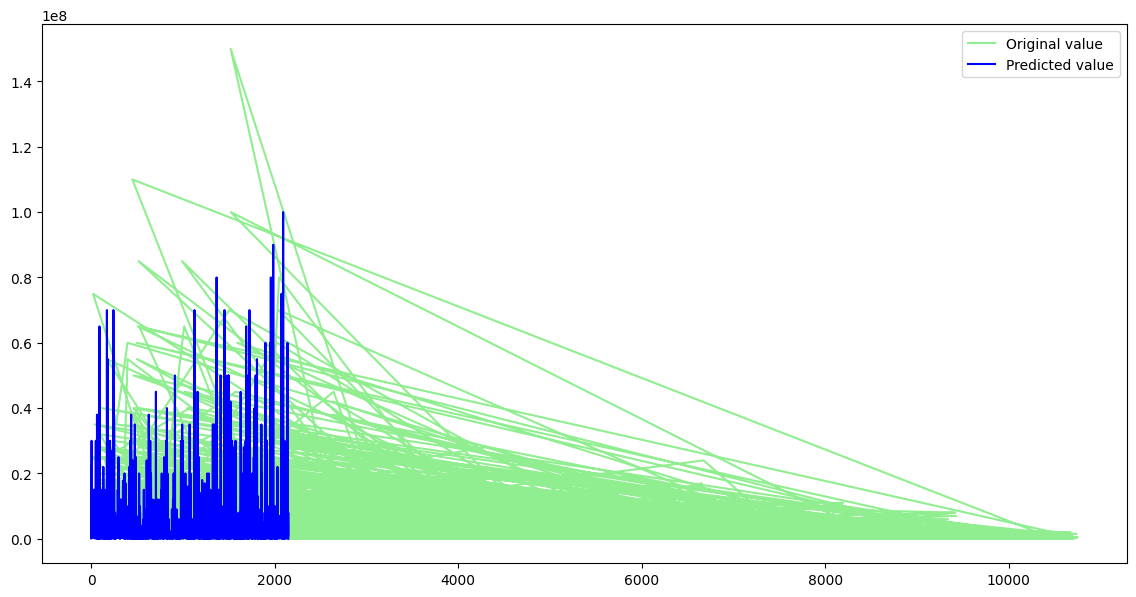

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(y_test,'lightgreen',label='Original value')
plt.plot(y_pred,'blue',label='Predicted value')
plt.legend()
plt.show()

Example:Predicting current price for the new player.

In [28]:
new_player = [180, 22, 34, 0, 0.033507074, 0.335070737, 0, 0, 0, 0, 2686, 175, 28, 1, 12000000, 2, 1]
new_player_array = np.array(new_player)
#Reshape the array to a 2D array
new_player_2d_array = new_player_array.reshape(1, -1)

prediction = dtc.predict(new_player_2d_array)
prediction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5000000.])